In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
df= pd.read_csv('Placement_Data_Full_Class.csv')

In [57]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Summarize the dataset before cleaning

#### Checking the shape of data frame

In [58]:
df.shape

(215, 15)

#### Checking basic info of dataframe

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### Summarizing categorical variable

In [60]:
categorical_vars = df.select_dtypes(include='object')
categorical_vars.describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


#### Summarizing Numerical variable

In [61]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## EDA

#### Checking proportion of data in modules of hsc_s

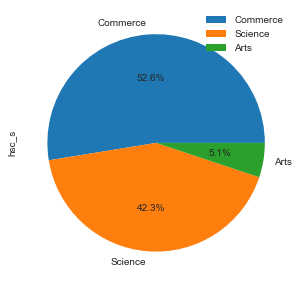

In [62]:
df_sym = pd.DataFrame(df['hsc_s'].value_counts())
df_sym.plot.pie(subplots=True,
autopct='%1.1f%%', 
figsize = (5,5))
plt.show()

In this data, there is 52.6% of student in commerce, 5.1% student in arts and other 42.3% of student in Science.

#### Determining the distribution of gender within the data set by calculating the ratio of Male to Female representation.

<AxesSubplot:ylabel='gender'>

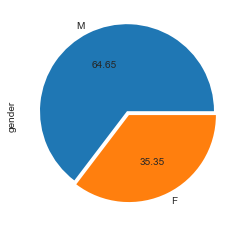

In [63]:
df['gender'].value_counts().plot(kind ='pie',
autopct = '%.2f',explode=[0.05,0])

The male population in the dataset constitutes 64.65%, while the female population accounts for 35.35%.

<AxesSubplot:xlabel='gender', ylabel='count'>

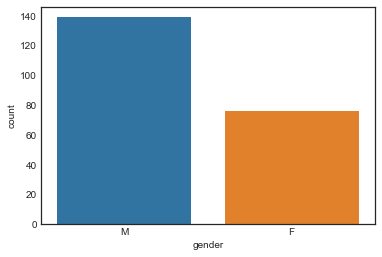

In [64]:
sns.countplot(data = df, x = 'gender')

**Gender proportion**

* Male = 65%
* Female = 35%

The number of records for male students in the dataset is nearly double the number of records for female students.

#### Analyzing the student distribution among undergraduate degree programs.

<AxesSubplot:ylabel='degree_t'>

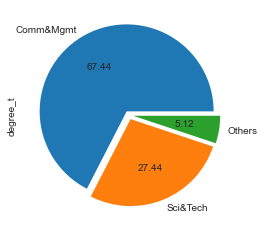

In [65]:
df['degree_t'].value_counts().plot(kind ='pie',
autopct = '%.2f',explode=[0.05, 0.05, 0.05])

**Student distribution Comm&Mgmt, Sci&Tech and others in under graduate degree**

* Commerce and Management = 67.44%
* Science and Technology = 27.44%
* Others = 5.12%

#### Checking the spread of students based on gender in the three streams of the 12th grade (hsc_s).

<AxesSubplot:xlabel='count', ylabel='hsc_s'>

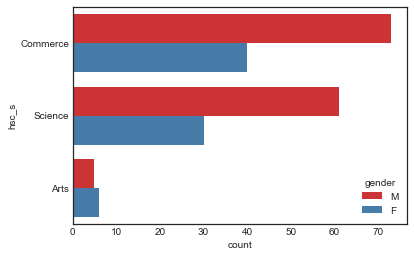

In [66]:
sns.countplot(y = 'hsc_s',hue = df['gender'], palette = "Set1", data =df)

**Distribution by gender in 3 streams in 12th Grade**


* The number of male students in Commerce is almost double that of female students. 
* The number of male students in Science is twice that of female students.
* Although female students in Arts outnumber male students, the difference is not significant.

## Data Cleaning

#### Dropping sl_no column because it is indexing column

In [67]:
df= df.drop(columns= ['sl_no'])

#### Checking null values


In [68]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

only salary column has 67 null rows

#### Filling null values of salary column

In [69]:
df['salary'].fillna(0, inplace=True)

In [70]:
df['salary'].isna().sum()

0

Filling null values of salary column with 0 as the rows with null values are of people who are not placed in jobs


#### Checking Data Type

In [71]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

All the variables have correct data type. However, 'workex' and 'status' variable's value can be changed to 0 and 1.

#### Changing workex and status values to 0 and 1

In [72]:
df['workex'].replace(['Yes' , 'No'],[1,0], inplace = True)
df['status'].replace(['Placed' , 'Not Placed'],[1,0], inplace = True)


In [73]:
df['workex']


0      0
1      1
2      0
3      0
4      0
      ..
210    0
211    0
212    1
213    0
214    0
Name: workex, Length: 215, dtype: int64

In [74]:
df['status']

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [75]:
df['workex'] = df['workex'].astype(bool)
df['status'] = df['status'].astype(bool)

In [76]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex               bool
etest_p           float64
specialisation     object
mba_p             float64
status               bool
salary            float64
dtype: object

#### Removing outliers in salary column

In [77]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['salary'] >= Q1 - 1.5 * IQR) & (df['salary'] <= Q3 + 1.5 *IQR)
df_filtered=df.loc[filter]


Text(0.5, 1.0, 'After removing outliers(salary)')

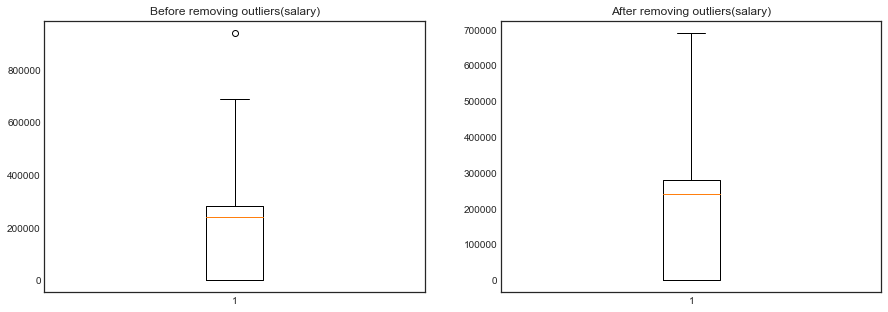

In [78]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(df['salary'])
ax.set_title('Before removing outliers(salary)')

ax=plt.subplot(122)
plt.boxplot(df_filtered['salary'])
ax.set_title('After removing outliers(salary)')


<AxesSubplot:>

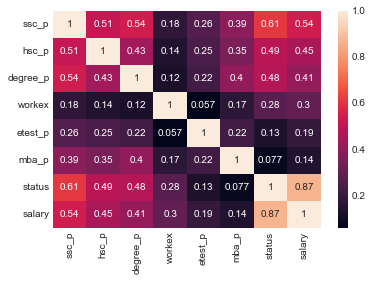

In [79]:
sns.heatmap(df.corr(),annot = True)

#### Convert the values in the "degree_t" column into separate columns and assign a value of 0 if the row does not contain that degree and 1 if it does.

In [80]:
# Split the values in the column at the '&' character
degree_split_df = df['degree_t'].str.split('&', expand=True)

# Flatten the resulting DataFrame
degree_split_df = degree_split_df.stack().reset_index(level=1, drop=True)

# Use pd.get_dummies to convert the values into separate columns with binary values
degree_split_df = pd.get_dummies(degree_split_df)

degree_split_df

,Comm,Mgmt,Others,Sci,Tech
0,0,0,0,1,0
0,0,0,0,0,1
1,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
...,...,...,...,...,...
212,0,1,0,0,0
213,1,0,0,0,0
213,0,1,0,0,0
214,1,0,0,0,0


#### Convert the values in the "specialization" column into separate columns and assign a value of 0 if the row does not contain that specialization and 1 if it does.

In [81]:
# Split the values in the column at the '&' character
specialisation_split_df = df['specialisation'].str.split('&', expand=True)

# Flatten the resulting DataFrame
specialisation_split_df = specialisation_split_df.stack().reset_index(level=1, drop=True)

# Use pd.get_dummies to convert the values into separate columns with binary values
specialisation_split_df = pd.get_dummies(specialisation_split_df)

specialisation_split_df

,Fin,HR,Mkt
0,0,0,1
0,0,1,0
1,0,0,1
1,1,0,0
2,0,0,1
...,...,...,...
212,1,0,0
213,0,0,1
213,0,1,0
214,0,0,1


#### Merging the "degree_split_df" and "specialisation_split_df" with the main data frame (df).

In [82]:
df = df.join([degree_split_df,specialisation_split_df])

In [83]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,status,salary,Comm,Mgmt,Others,Sci,Tech,Fin,HR,Mkt
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,1,0,0,0,1
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,1,0,0,1,0
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,0,1,0,0,1
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,0,1,0,1,0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,True,86.5,...,True,200000.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,False,70.0,...,True,204000.0,0,1,0,0,0,0,1,0
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,1,0,0,0,0,0,0,1
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,1,0,0,0,0,0,1,0
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,0,1,0,0,0,0,0,1


#### Converting the data type of the specified columns to boolean.

In [84]:
df['workex'] = df['workex'].astype(bool)
df['status'] = df['status'].astype(bool)

df['Comm'] = df['Comm'].astype(bool)
df['Mgmt'] = df['Mgmt'].astype(bool)
df['Others'] = df['Others'].astype(bool)
df['Sci'] = df['Sci'].astype(bool)
df['Tech'] = df['Tech'].astype(bool)
df['Fin'] = df['Fin'].astype(bool)
df['HR'] = df['HR'].astype(bool)
df['Mkt'] = df['Mkt'].astype(bool)

#### Checking data type

In [85]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex               bool
etest_p           float64
specialisation     object
mba_p             float64
status               bool
salary            float64
Comm                 bool
Mgmt                 bool
Others               bool
Sci                  bool
Tech                 bool
Fin                  bool
HR                   bool
Mkt                  bool
dtype: object

## Answering The Given Questions

#### 1) Who is getting more salary on the basis of Gender?

In [86]:
def percentageCalc(number1, number2):

    percentage_difference = 100 * (abs(number1 - number2) / ((number1 + number2) / 2))
    
    return format(percentage_difference)

# Group data by gender
grouped = df.groupby("gender")

# Calculate average salary for each gender group
average_salary = grouped["salary"].mean()

# Print average salary for each gender group
print(average_salary)
print(percentageCalc(218066,167863))

gender
F    167863.013699
M    218065.934066
Name: salary, dtype: float64
26.01670255409674


The average salary for female individuals is 167863.01, while the average salary for male individuals is 218065.93. 

The male average salary is 26.02% higher than the female average salary, calculated as the difference between the two groups.

#### 2) Which specialization has more job placement?

291
188
103


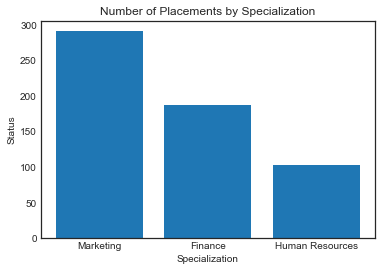

In [87]:
df
marketing_placements = (df['Mkt'].eq(True) & df['status'].eq(True)).sum()
finance_placements = (df['Fin'].eq(True) & df['status'].eq(True)).sum()
hr_placements = (df['HR'].eq(True) & df['status'].eq(True)).sum()

print(marketing_placements)
print(finance_placements)
print(hr_placements)

# Plot the results
placements = [marketing_placements, finance_placements, hr_placements]
specializations = ['Marketing', 'Finance', 'Human Resources']
plt.bar(specializations, placements)
plt.xlabel("Specialization")
plt.ylabel("Status")
plt.title("Number of Placements by Specialization")
plt.show()

There are three specializations: Marketing, Finance, and Human Resources, with 291, 188, and 103 successful placements, respectively. This data represents the number of students placed in jobs out of the total number of students who specialize in each area. It provides insight into which specializations are more sought after and which are less popular in the job market.

#### 3) Which specialization is getting more salary?

In [88]:
marketing_salary = df[df['Mkt'] == 1]['salary'].mean()
finance_salary = df[df['Fin'] == 1]['salary'].mean()
hr_salary = df[df['HR'] == 1]['salary'].mean()

# display the results
print("Average salary for marketing:", marketing_salary)
print("Average salary for finance:", finance_salary)
print("Average salary for human resources:", hr_salary)

Average salary for marketing: 200572.7923627685
Average salary for finance: 238059.3220338983
Average salary for human resources: 152229.50819672132


The average salary of successfully placed students for each specialization has been calculated. The data shows that the average salary for Marketing is 200,572.79, for Finance it is 238,059.32, and for Human Resources it is 152,229.51. This information can provide insight into the job market for each specialization and assist students in making informed career choices.

#### 4) Which hsc_s gets more salary on the basis of gender?

In [89]:
# Group data by hsc_s module
grouped = df.groupby("hsc_s")

# Calculate average salary for each hsc_s module group
average_salary = grouped["salary"].mean()

# Print average salary for each hsc_s module group
print(average_salary)


hsc_s
Arts        135777.777778
Commerce    201831.111111
Science     205590.909091
Name: salary, dtype: float64


The hsc_s has three modules: Arts, Commerce, and Science. The average salary for Arts is 135777.77, which is roughly 46% lower compared to the average salary of Commerce which stands at 201831.11. Science has an average salary of 205590.90, which is about 51% higher than Arts but 1% lower than Commerce.

#### 5) Who has high job placement on the basis of degree_t and gender?

In [90]:
grouped = df.groupby(["degree_t", "gender"])["status"].agg("sum")
result = grouped.reset_index().sort_values("status", ascending=False)
result

,degree_t,gender,status
1,Comm&Mgmt,M,276
0,Comm&Mgmt,F,132
5,Sci&Tech,M,120
4,Sci&Tech,F,44
2,Others,F,8
3,Others,M,2


The data represents the job placement status of students based on their degree type (degree_t) and gender.

For male students, those with a degree in Commerce & Management have the most placements with 276. Female students with the same degree have 132 placements.

Male students with a degree in Science & Technology have 120 placements, which is lower compared to male students in Commerce & Management. The number of female students placed in Science & Technology is 44, which is also lower than female students in Commerce & Management.

The number of male students placed with a degree in Others is 2, which is significantly lower compared to other degrees. The number of female students placed with a degree in Others is 8, which is also lower compared to other degrees.

In conclusion, a degree in Commerce & Management leads to more placements for both male and female students, followed by Science & Technology. A degree in Others has a much lower number of placements for both genders.

#### 6) Which gender has high work experience?

In [91]:
# Calculating the sum of work experience for each gender
gender_work_experience = df.groupby("gender")["workex"].sum()
result = gender_work_experience.reset_index().sort_values("gender", ascending=False)
result

,gender,workex
1,M,204
0,F,84


The data shows a breakdown of students' work experience by gender, with 204 male students and 84 female students reported to have work experience. This information can be used to examine the gender distribution of students with work experience and make informed decisions or observations.



#### 7) Which specialization is getting more salary in the basis of degree_t?

In [95]:
results = []

for degree in ['Comm&Mgmt', 'Sci&Tech', 'Others']:
    MktBasedOnDegree = df[(df['Mkt'] == True) & (df['degree_t'] == degree)]['salary'].mean()
    FinBasedOnDegree = df[(df['Fin'] == True) & (df['degree_t'] == degree)]['salary'].mean()
    HRBasedOnDegree = df[(df['HR'] == True) & (df['degree_t'] == degree)]['salary'].mean()                             

    results.append({
        'degree': degree,
        'Mkt': MktBasedOnDegree,
        'Fin': FinBasedOnDegree,
        'HR': HRBasedOnDegree
    })
    
degrree_df = pd.DataFrame(results)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,status,salary,Comm,Mgmt,Others,Sci,Tech,Fin,HR,Mkt
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,False,False,False,True,False,False,False,True
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,False,False,False,True,False,False,True,False
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,False,False,False,False,True,False,False,True
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,False,False,False,False,True,False,True,False
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,True,86.5,...,True,200000.0,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,False,70.0,...,True,204000.0,False,True,False,False,False,False,True,False
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,True,False,False,False,False,False,False,True
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,True,False,False,False,False,False,True,False
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,False,True,False,False,False,False,False,True


#### 8) Which degree_t is placed more?

In [96]:
degree_job_placement = df.groupby("degree_t")["status"].sum()

result = degree_job_placement.reset_index().sort_values("status", ascending=False)

result


,degree_t,status
0,Comm&Mgmt,408
2,Sci&Tech,164
1,Others,10


The data contains 3 different types of degree_t, which are "Comm&Mgmt", "Sci&Tech", and "Others". Out of these, "Comm&Mgmt" has the largest number of job placements at 408, followed by "Sci&Tech" with 164 placements. "Others" has the least amount of job placements with just 10.

#### 9) Which degree_t is getting low salary?

In [97]:
# removing the outliers in salary 
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['salary'] >= Q1 - 1.5 * IQR) & (df['salary'] <= Q3 + 1.5 *IQR)
df_filtered=df.loc[filter]


#Finding the degree_t with salary below average salary
average_salary = df_filtered['salary'].mean()
low_salary_degree = df['degree_t'][df['salary'] < average_salary].value_counts()
result = low_salary_degree.reset_index()
result

,index,degree_t
0,Comm&Mgmt,172
1,Sci&Tech,72
2,Others,12


The table above represents the number of records in the dataset for individuals with a particular degree program - Comm&Mgmt, Sci&Tech, or Others - whose salaries fall below the average salary.

The highest number of records, 172, correspond to individuals with a degree in Comm&Mgmt, followed by Sci&Tech with 72 records, and the lowest number of records, 12, correspond to individuals with a degree in Others. These results provide insight into the competitiveness of the job market for individuals with these specific degrees, and can be compared to results for other degree programs. It can be inferred that individuals with a degree in Commerce and Management have lower salaries compared to those with other degrees.

#### 10) Which degree_t is has low job placement?

In [98]:
df['status'] = df['salary'] < df['salary'].mean()

degree_counts = df.groupby(['degree_t', 'status']).size().reset_index(name='count')
degree_counts = degree_counts[degree_counts['status'] == True]

degree_counts.sort_values(by='count', ascending=True)

,degree_t,status,count
3,Others,True,12
5,Sci&Tech,True,76
1,Comm&Mgmt,True,192


12 people have "Others" degree and got job placements, 76 with "Sci&Tech", 192 with "Comm&Mgmt". People with "Sci&Tech" degree have higher placement than "Others" but lower than "Comm&Mgmt". This data can be useful to understand job placement trends.